In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
from pymongo import MongoClient
mongoClient = MongoClient()
db = mongoClient.tweets

In [3]:
from configparser import ConfigParser
parser = ConfigParser()
parser.read('config.ini')
query_terms = list(parser.get('FILTER', 'filter_terms').split(','))

In [4]:
dates = []
for tweet in db.google.find():
    dates.append(datetime.fromtimestamp(int(tweet['timestamp_ms'])/1000))

dates = pd.Series(dates)

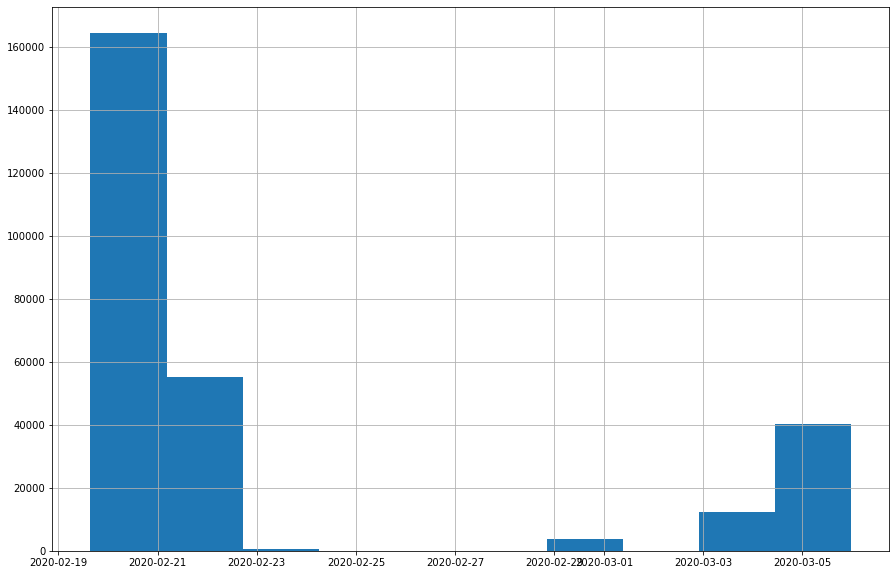

In [5]:
dates.hist(figsize=(15,10))

In [6]:
tweet_counts = []
for term in query_terms:
    tweet_counts.append(db[term].count_documents({}))

<BarContainer object of 7 artists>

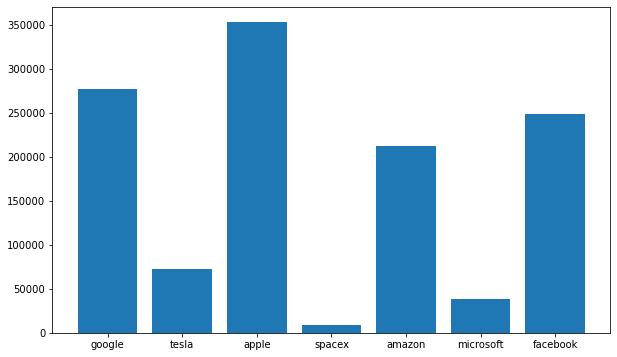

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(query_terms, tweet_counts)

In [8]:
sum(tweet_counts)

1209432